In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
from collections import Counter
import matplotlib.ticker as plticker
import pickle 
pd.set_option('display.max_columns', None)

In [17]:
def initialize_style_parameters(small = False):
  
    if small == False:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 22
                }
    else:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 15
                }

    plt.rc('font', **font)

In [18]:
def cdf(xlist, namelist, title, colors, x_title = "", xlog=False, filename = "", size = (15, 6)):
    
    initialize_style_parameters()
    
    fig, ax = plt.subplots(figsize=(size[0],size[1]))
    for x,n,c in zip(xlist,namelist,colors):
        sorteddiff = np.sort(x)
        p = 1. * np.arange(len(sorteddiff))/(len(sorteddiff) - 1)
        plt.plot(sorteddiff, p,label=n, color=c, linewidth=3)

    if(xlog==True):
        plt.xscale('symlog')
        
    plt.ylabel('cumulative distribution function')
    plt.tight_layout()
    plt.grid(linestyle='dotted',linewidth=1.5)
    ax.legend(facecolor='white', framealpha=1, frameon = True)
    plt.xlabel(x_title)
    if filename!='':
        plt.savefig(filename,bbox_inches="tight")
        
    ax.set_title(title)
    plt.show()

In [19]:
def boxplot(data, xlabel, ylabel, width = 0.3, style = "whitegrid", x = None, y = None, hue = None, colors = None, small = False, img_name = None):
    
    fig, ax = plt.subplots(figsize=(15,6))
    sns.set_style(style)

    if colors is not None:
        sns.set_palette(sns.color_palette(colors))

    sns.boxplot(ax = ax, data = data, width = width, x = x, y = y, hue = hue).set(
        xlabel = xlabel, 
        ylabel = ylabel,
        yscale = "log"
    )

    if img_name is not None:
        save_pdf_img(plt, img_name)

    plt.show()

In [20]:
US_PAGES = pd.read_csv("page_list/US_PAGES_TO_USE_FOR_ANALYSIS_final.csv")
US_PAGES["page_created_year"] = [int(item[:4]) for item in US_PAGES["page_created_month"].to_list()]
US_PAGES

/tmp/ipykernel_2660505/1667132677.py:1: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  US_PAGES = pd.read_csv("page_list/US_PAGES_TO_USE_FOR_ANALYSIS_final.csv")


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,page_created_year
0,0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17,2010
1,1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17,2010
2,2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2,2015
3,3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24,2016
4,4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [21]:
!pwd

/ssd/news_discovery/notebooks


In [22]:
LAST_POST_DAY = datetime.strptime(max(US_PAGES["lastPostDate"].to_list()), "%Y-%m-%d") #Get time of last post (data collection day)
FIRST_POST_DAY = datetime.strptime(min(US_PAGES["firstPostDate"].to_list()), "%Y-%m-%d") #Get time of last post (data collection day)

#created_months = [max(datetime.strptime(item,"%Y-%m"), FIRST_POST_DAY) for item in US_PAGES["page_created_month"].to_list()] 

created_months = [datetime.strptime(item,"%Y-%m") for item in US_PAGES["page_created_month"].to_list()] 

#Get the monday preceeding each day (to compute number of weeks later)
LAST_POST_WEEK = (LAST_POST_DAY - timedelta(days=LAST_POST_DAY.weekday()))
created_weeks = [(item - timedelta(days=item.weekday())) for item in created_months]

US_PAGES["number_of_weeks_since_creation"] = [(LAST_POST_WEEK-item).days / 7 for item in created_weeks]


In [23]:
FIRST_POST_DAYS = [datetime.strptime(item, "%Y-%m-%d") for item in US_PAGES["firstPostDate"].to_list()]
LAST_POST_DAYS = [datetime.strptime(item, "%Y-%m-%d") for item in US_PAGES["lastPostDate"].to_list()]

NUMBER_OF_DAYS = [(LAST_POST_DAYS[index] - FIRST_POST_DAYS[index]).days  for index in range(len(FIRST_POST_DAYS)) ]

US_PAGES["number_of_days_between_first_and_last_posts"] = NUMBER_OF_DAYS


### Dividing pages into listed and non listed ones

In [24]:
LISTED_PAGES = US_PAGES[US_PAGES["niche"] == False]
NONLISTED_PAGES = US_PAGES[US_PAGES["niche"] == True]

# 1. Timeline of pages creation - per month

### Get number of pages created each month

In [25]:
counter_listed_page_created = LISTED_PAGES.groupby('page_created_month').page_id.count().reset_index()
counter_nonlisted_page_created = NONLISTED_PAGES.groupby('page_created_month').page_id.count().reset_index()

counter_listed_page_created = counter_listed_page_created.rename(columns={"page_id": "Listed pages"})
counter_nonlisted_page_created = counter_nonlisted_page_created.rename(columns={"page_id": "Non-listed pages"})

counter_page_created = counter_nonlisted_page_created.merge(counter_listed_page_created, how="outer", on="page_created_month").fillna(0)


### Plotting listed pages

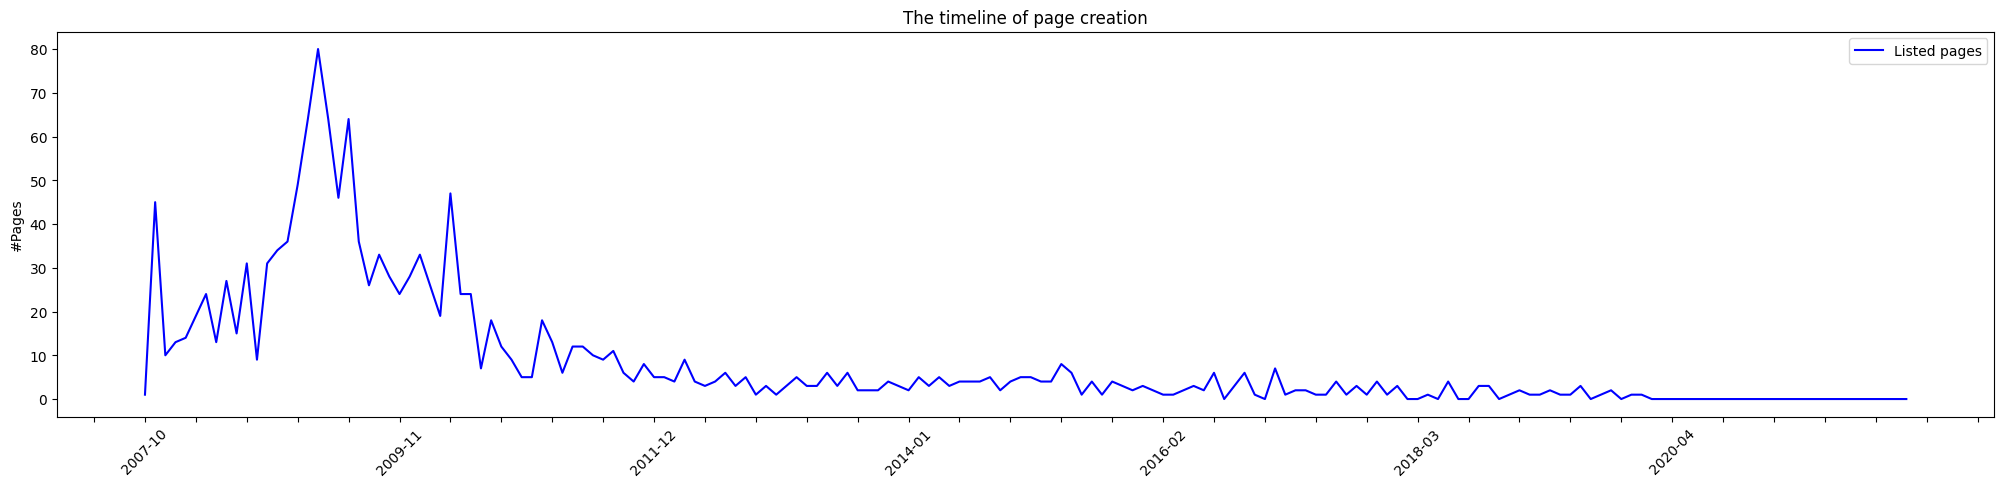

In [26]:
fig, ax = plt.subplots(figsize=(25,5))
counter_page_created[counter_page_created.page_created_month>='2007-09'].plot(kind='line',ax=ax,color='blue',rot=45, y=["Listed pages"], x="page_created_month")
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('')
ax.set_ylabel('#Pages')
plt.title('The timeline of page creation')
plt.show()


### Plotting non-listed pages

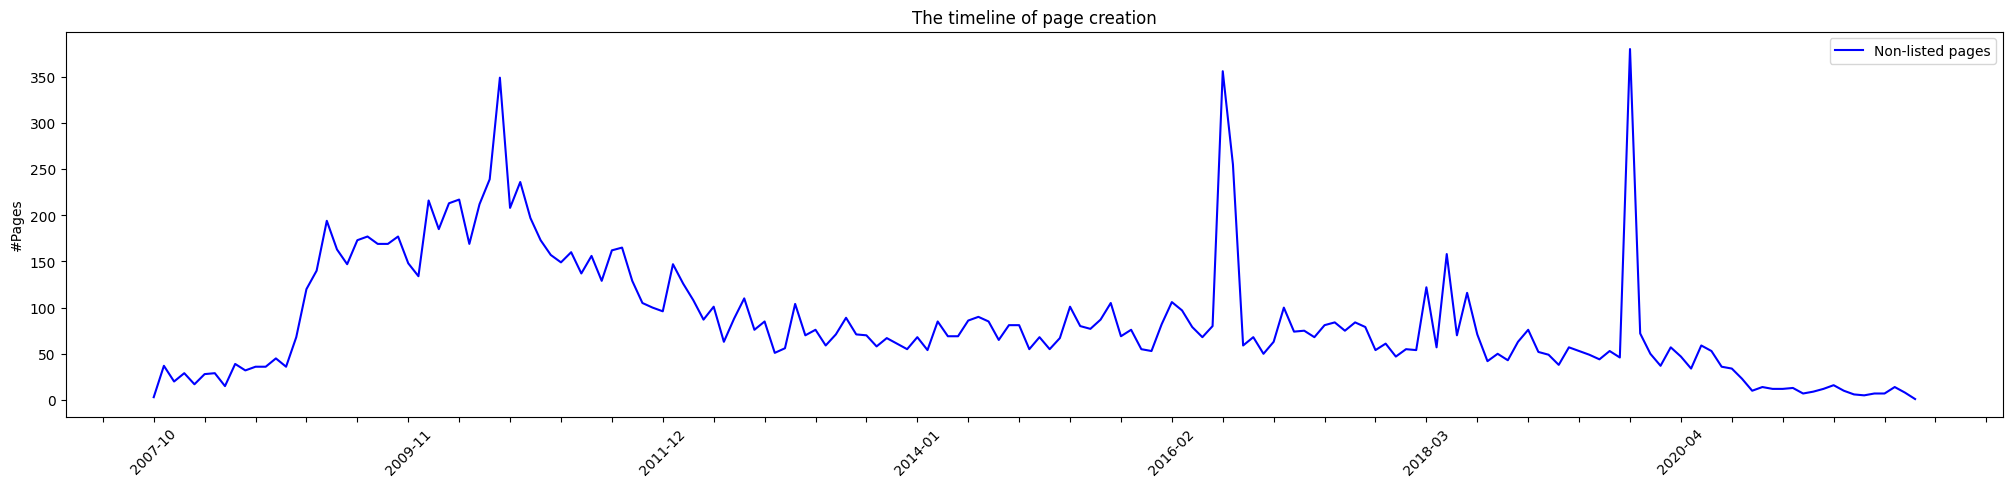

In [27]:
fig, ax = plt.subplots(figsize=(25,5))
counter_page_created[counter_page_created.page_created_month>='2007-09'].plot(kind='line',ax=ax,color='blue',rot=45, y=["Non-listed pages"], x="page_created_month")
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('')
ax.set_ylabel('#Pages')
plt.title('The timeline of page creation')
plt.show()


# 2- Timeline of page creation - per year

In [28]:
counter_listed_page_created = LISTED_PAGES.groupby('page_created_year').page_id.count().reset_index()
counter_nonlisted_page_created = NONLISTED_PAGES.groupby('page_created_year').page_id.count().reset_index()

counter_listed_page_created = counter_listed_page_created.rename(columns={"page_id": "MBFC/NG pages"})
counter_nonlisted_page_created = counter_nonlisted_page_created.rename(columns={"page_id": "Non-MBFC/NG pages"})

counter_page_created = counter_nonlisted_page_created.merge(counter_listed_page_created, how="outer", on="page_created_year").fillna(0)

sum_listed = sum([item for item in counter_page_created["MBFC/NG pages"].to_list()])
sum_nonlisted = sum([item for item in counter_page_created["Non-MBFC/NG pages"].to_list()])

counter_page_created["MBFC/NG pages"] = [100*(item/sum_listed) for item in counter_page_created["MBFC/NG pages"].to_list()]
counter_page_created["Non-MBFC/NG pages"] = [100*(item/sum_nonlisted) for item in counter_page_created["Non-MBFC/NG pages"].to_list()]



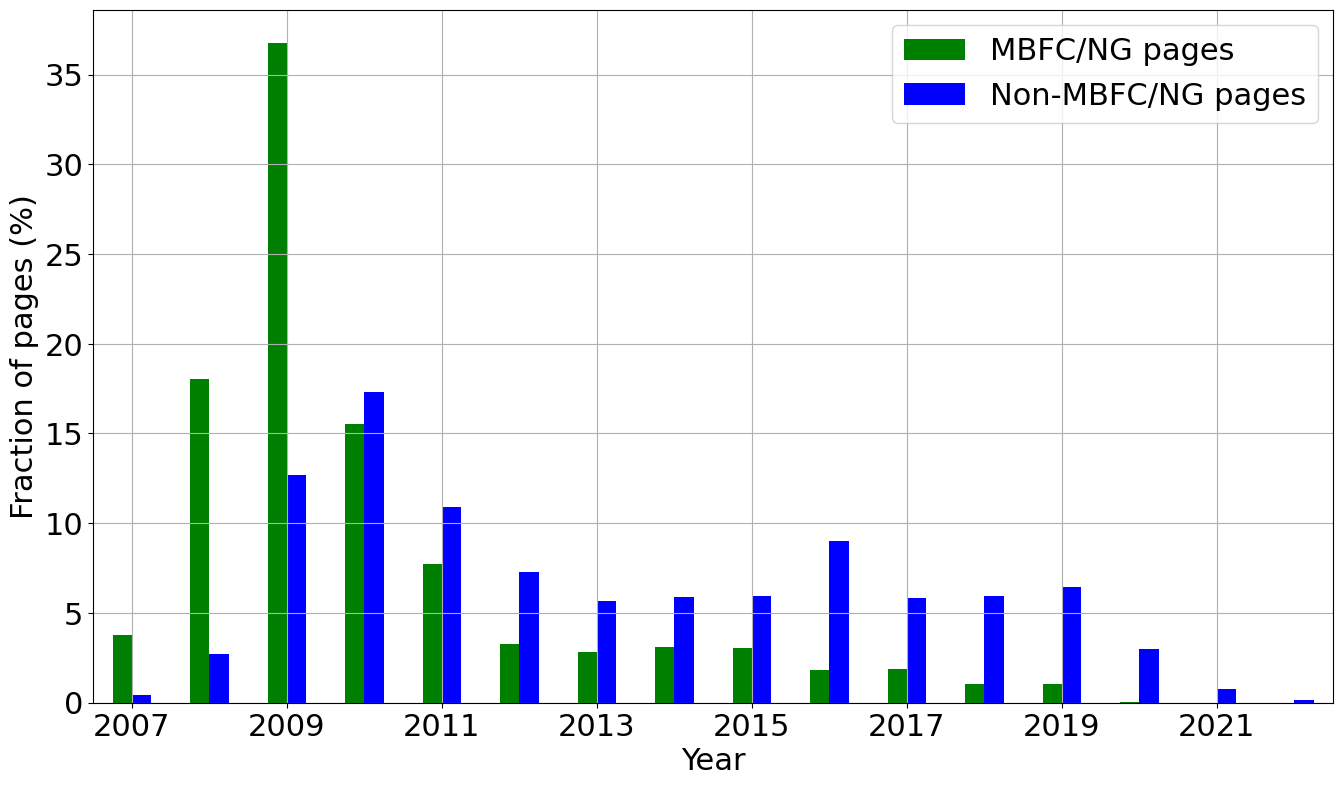

In [29]:
initialize_style_parameters()
fig, ax = plt.subplots(figsize=(16,9))
counter_page_created[(counter_page_created["MBFC/NG pages"] > 0.1) | (counter_page_created["Non-MBFC/NG pages"] > 0.1)].plot(kind='bar',ax=ax,color=['green', "blue"],rot=0, y=["MBFC/NG pages", "Non-MBFC/NG pages"], x="page_created_year", grid=True)
loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of pages (%)')
plt.title('')
plt.show()

fig.savefig('figures/pages_created_time.pdf', bbox_inches='tight')



# 3. Activity 

### Pages active in June 2022

In [30]:
print("listed pages:", Counter(LISTED_PAGES["activeJun2022"]))
print("Non-listed pages:", Counter(NONLISTED_PAGES["activeJun2022"]))

listed pages: Counter({True: 1422, False: 52})
Non-listed pages: Counter({True: 13915, False: 1170})


### Pages in active in October 2020

In [31]:
print("listed pages:", Counter(LISTED_PAGES["activeOct2020"]))
print("Non-listed pages:", Counter(NONLISTED_PAGES["activeOct2020"]))

listed pages: Counter({True: 1468, False: 6})
Non-listed pages: Counter({True: 14758, False: 327})


### Active weeks

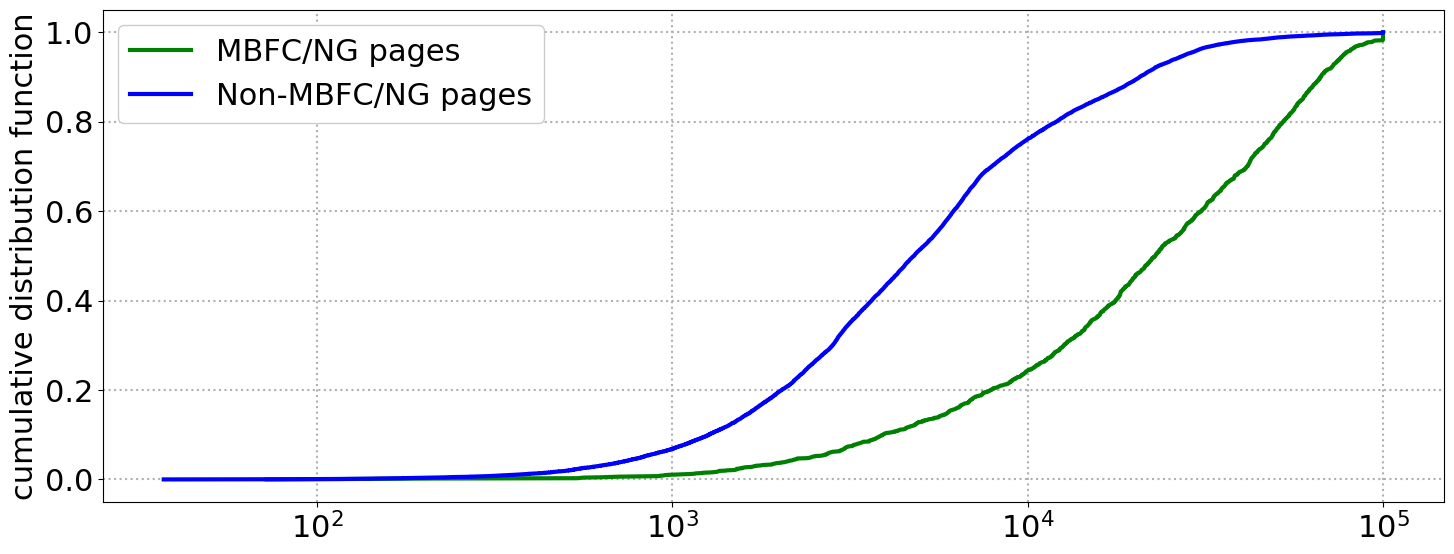

In [32]:


nonlisted_posts = NONLISTED_PAGES["totalPosts"].to_list()
listed_posts = LISTED_PAGES["totalPosts"].to_list()


cdf([listed_posts, nonlisted_posts], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "", xlog=True, size = (15, 6))


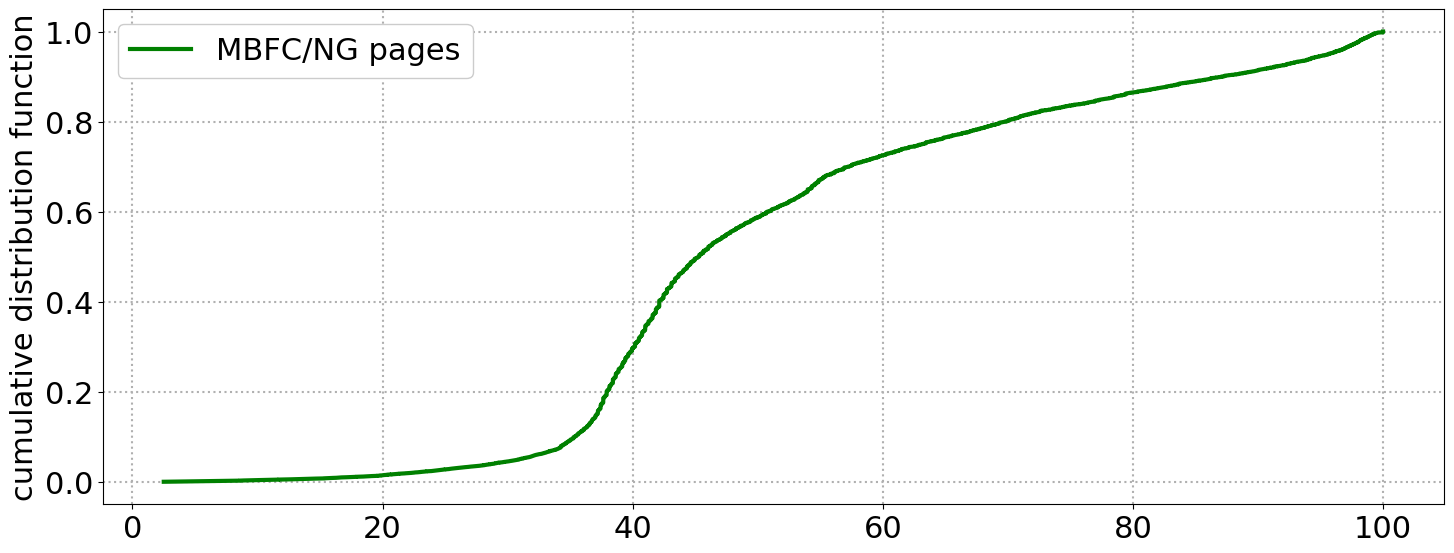

In [33]:
fraction_active_weeks = (100*US_PAGES["activeWeeks"]/US_PAGES["number_of_weeks_since_creation"]).to_list()


cdf([fraction_active_weeks], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "", xlog=False, size = (15, 6))




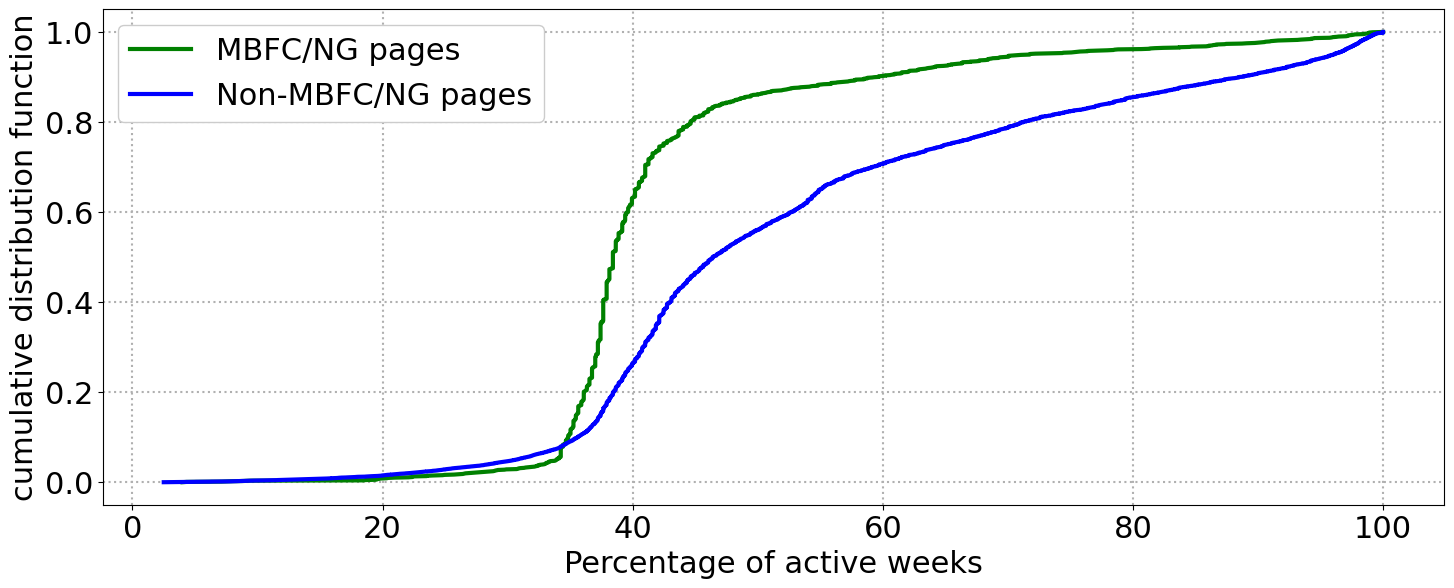

In [34]:
fraction_active_weeks_listed_pages = (100*LISTED_PAGES["activeWeeks"]/LISTED_PAGES["number_of_weeks_since_creation"]).to_list()
fraction_active_weeks_nonlisted_pages = (100*NONLISTED_PAGES["activeWeeks"]/NONLISTED_PAGES["number_of_weeks_since_creation"]).to_list()

#REMOVE INCORRECT ELEMENTS

fraction_active_weeks_listed_pages = [item for item in fraction_active_weeks_listed_pages if item <= 100]
fraction_active_weeks_nonlisted_pages = [item for item in fraction_active_weeks_nonlisted_pages if item <= 100]

cdf([fraction_active_weeks_listed_pages, fraction_active_weeks_nonlisted_pages], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "Percentage of active weeks", xlog=False, size = (15, 6), filename ="figures/fraction_of_active_weeks.pdf" )



In [35]:
print("listed : ",len([item for item in fraction_active_weeks_listed_pages if item >=80])/len(fraction_active_weeks_listed_pages))
print("nonlisted : ",len([item for item in fraction_active_weeks_nonlisted_pages if item >=80])/len(fraction_active_weeks_nonlisted_pages))



listed :  0.03867028493894165
nonlisted :  0.14517732847199205


### Total posts

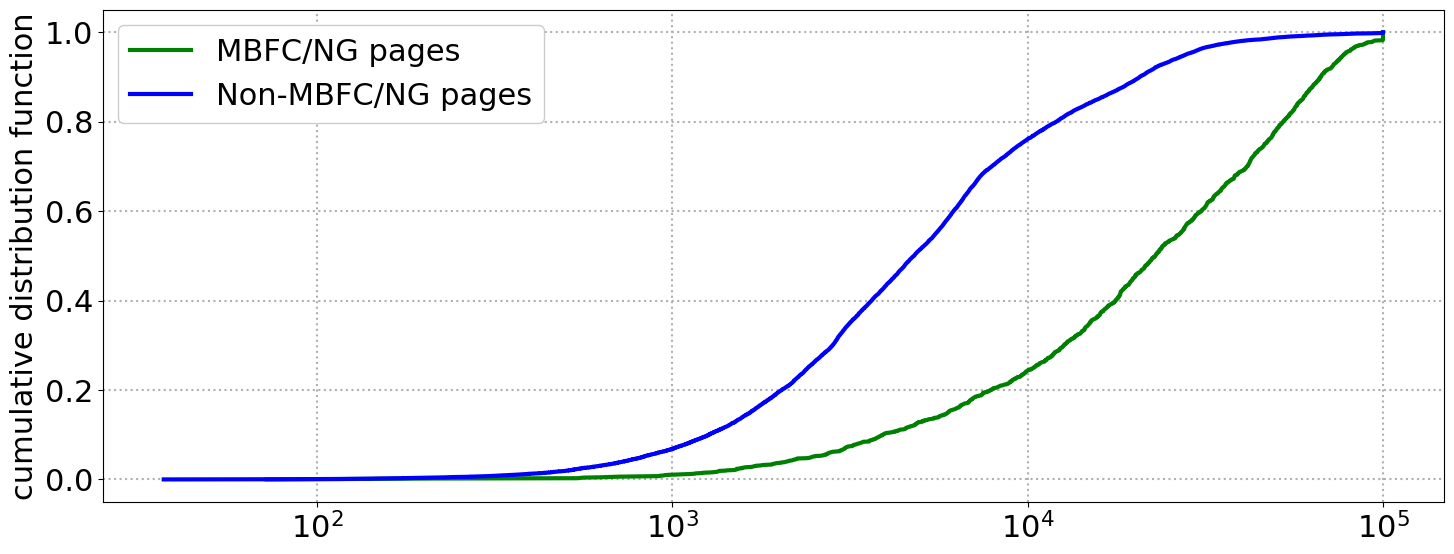

In [36]:
nonlisted_posts = NONLISTED_PAGES["totalPosts"].to_list()
listed_posts = LISTED_PAGES["totalPosts"].to_list()


cdf([listed_posts, nonlisted_posts], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "", xlog=True, size = (15, 6))




### Average published posts per active week

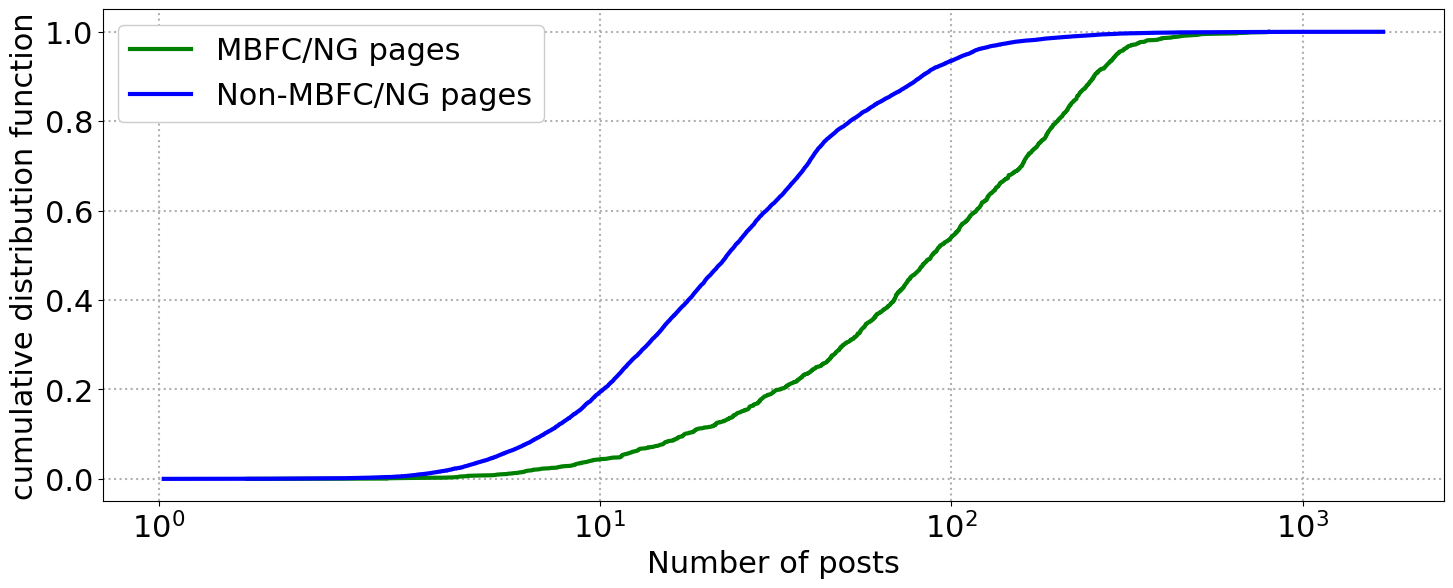

listed median 88.26335877862596
nonlisted median 23.0763358778626


In [37]:
nonlisted_posts = NONLISTED_PAGES["avgPostsPerAcitveWeek"].to_list()
listed_posts = LISTED_PAGES["avgPostsPerAcitveWeek"].to_list()


cdf([listed_posts, nonlisted_posts], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "Number of posts", xlog=True, size = (15, 6), filename="figures/number_of_posts_per_active_week.pdf")


print("listed median", np.median(listed_posts))
print("nonlisted median", np.median(nonlisted_posts))



### Average published posts per week

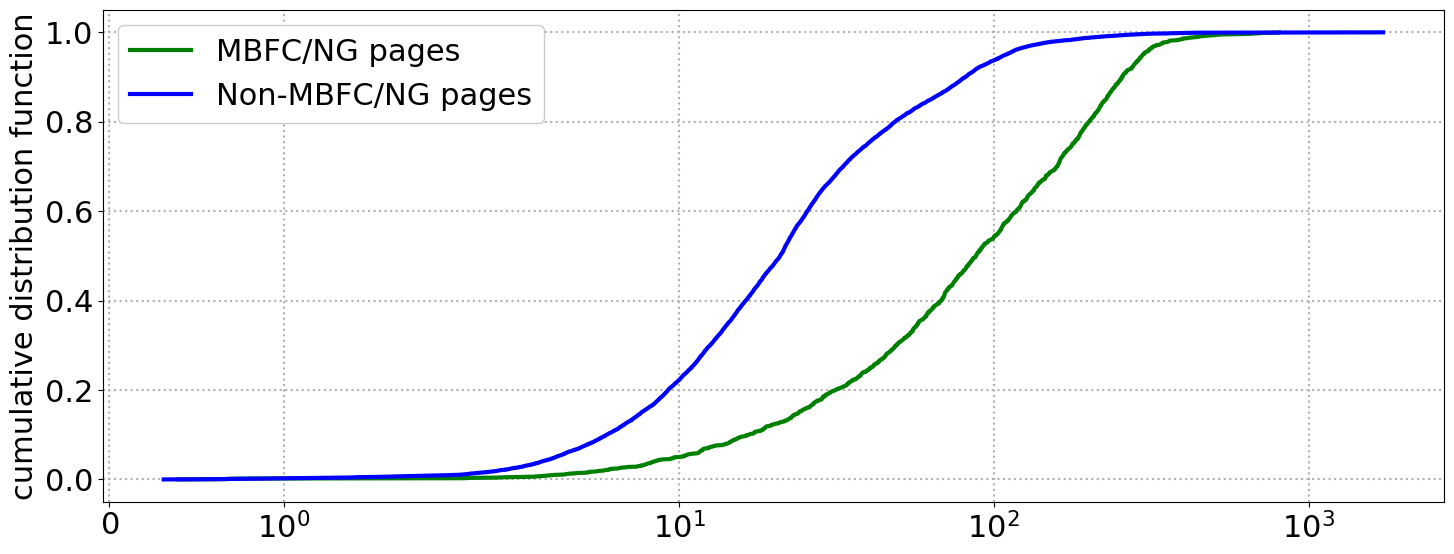

In [38]:
nonlisted_posts = NONLISTED_PAGES["avgPostsPerWeek"].to_list()
listed_posts = LISTED_PAGES["avgPostsPerWeek"].to_list()


cdf([listed_posts, nonlisted_posts], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "", xlog=True, size = (15, 6))


### Get number of posts per month for all pages

In [39]:
with open('posts_per_day_per_page.pkl', 'rb') as f:
    POSTS_PER_DAY_PER_PAGE = pickle.load(f)

In [40]:
ACTIVE_PAGES_PER_MONTH = pd.read_csv("active_pages_per_month.csv")
ACTIVE_PAGES_PER_WEEK = pd.read_csv("active_pages_per_week.csv")
ACTIVE_PAGES_PER_DAY = pd.read_csv("active_pages_per_day.csv")
PAGES_MIN_AND_MAX = pd.read_csv("pages_min_and_max_post_dates.csv")

In [41]:
ACTIVE_PAGES_PER_MONTH = ACTIVE_PAGES_PER_MONTH.sort_values(by='day', ascending=True)
ACTIVE_PAGES_PER_WEEK = ACTIVE_PAGES_PER_WEEK.sort_values(by='day', ascending=True)
ACTIVE_PAGES_PER_DAY = ACTIVE_PAGES_PER_DAY.sort_values(by='day', ascending = True)
PAGES_MIN_AND_MAX = PAGES_MIN_AND_MAX.sort_values(by="delta", ascending = True)

### Active pages per day

In [42]:
#NB_PAGES = 1000
#PAGE_IDS = ACTIVE_PAGES_PER_WEEK.groupby('page').day.count().reset_index().sort_values(by='day', ascending=True)["day"].to_list()[:NB_PAGES]

#PAGES_TO_CONSIDER = ACTIVE_PAGES_PER_DAY[ACTIVE_PAGES_PER_DAY["page"].isin(PAGE_IDS)]


In [43]:
NB_PAGES = 500

PAGE_IDS = PAGES_MIN_AND_MAX["page_id"].to_list()[:NB_PAGES]

PAGES_TO_CONSIDER = ACTIVE_PAGES_PER_DAY[ACTIVE_PAGES_PER_DAY["page"].isin(PAGE_IDS)]

OLD_PAGE_IDS = PAGES_TO_CONSIDER["page"].to_list()
DISTINCT_OLD_PAGE_IDS = set(OLD_PAGE_IDS)

idx = 0
for page_id in DISTINCT_OLD_PAGE_IDS:
    for idx2, page_id2 in enumerate(OLD_PAGE_IDS):
        if page_id2 == page_id:  
            OLD_PAGE_IDS[idx2] = idx    
    idx+=1
    
    
PAGES_TO_CONSIDER["page"] = OLD_PAGE_IDS
    

/tmp/ipykernel_2660505/1048039901.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAGES_TO_CONSIDER["page"] = OLD_PAGE_IDS


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

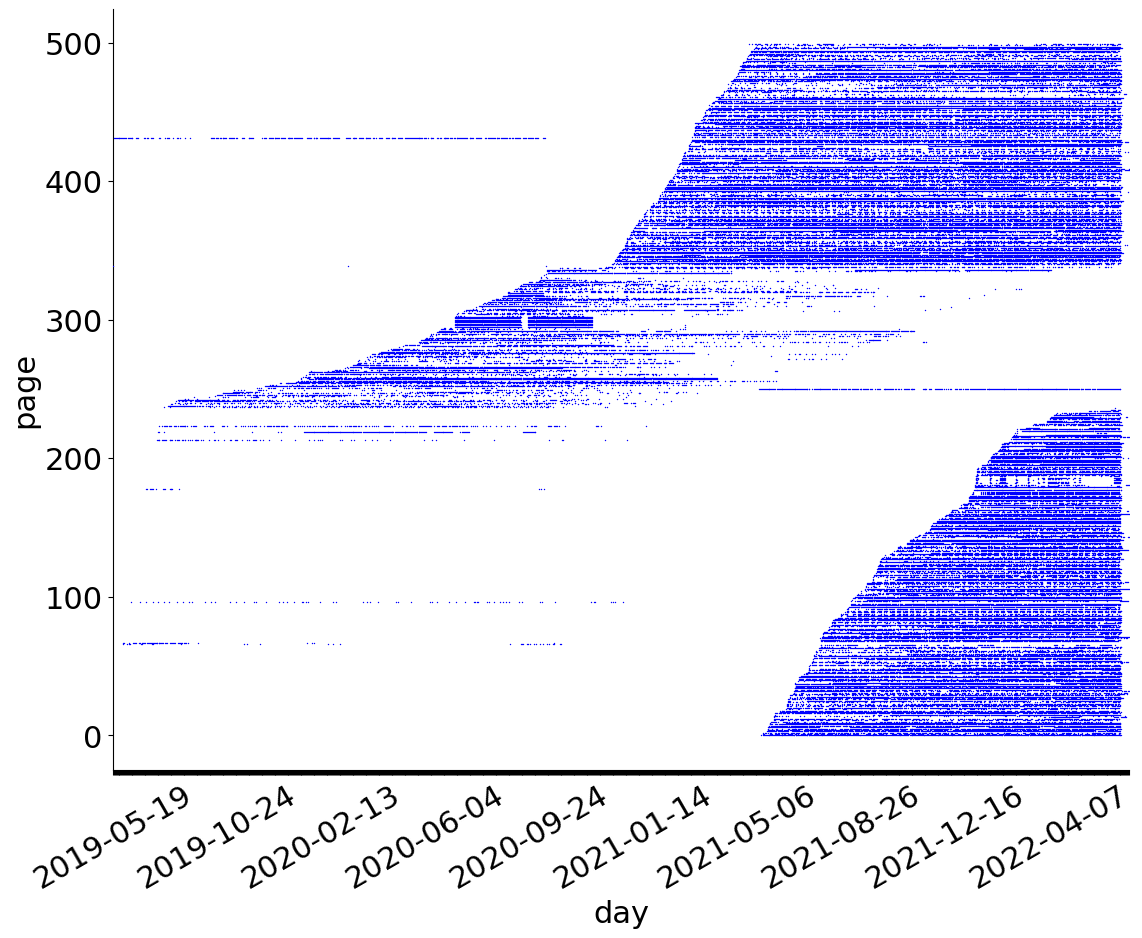

In [44]:
g = sns.catplot(data=PAGES_TO_CONSIDER, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=1)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%112 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


In [45]:
NB_PAGES = 5000

PAGE_IDS = PAGES_MIN_AND_MAX["page_id"].to_list()[:NB_PAGES]

PAGES_TO_CONSIDER = ACTIVE_PAGES_PER_DAY[ACTIVE_PAGES_PER_DAY["page"].isin(PAGE_IDS)]

OLD_PAGE_IDS = PAGES_TO_CONSIDER["page"].to_list()
DISTINCT_OLD_PAGE_IDS = set(OLD_PAGE_IDS)

idx = 0
for page_id in DISTINCT_OLD_PAGE_IDS:
    for idx2, page_id2 in enumerate(OLD_PAGE_IDS):
        if page_id2 == page_id:  
            OLD_PAGE_IDS[idx2] = idx    
    idx+=1
    
    
PAGES_TO_CONSIDER["page"] = OLD_PAGE_IDS


/tmp/ipykernel_2660505/3739073292.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAGES_TO_CONSIDER["page"] = OLD_PAGE_IDS


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

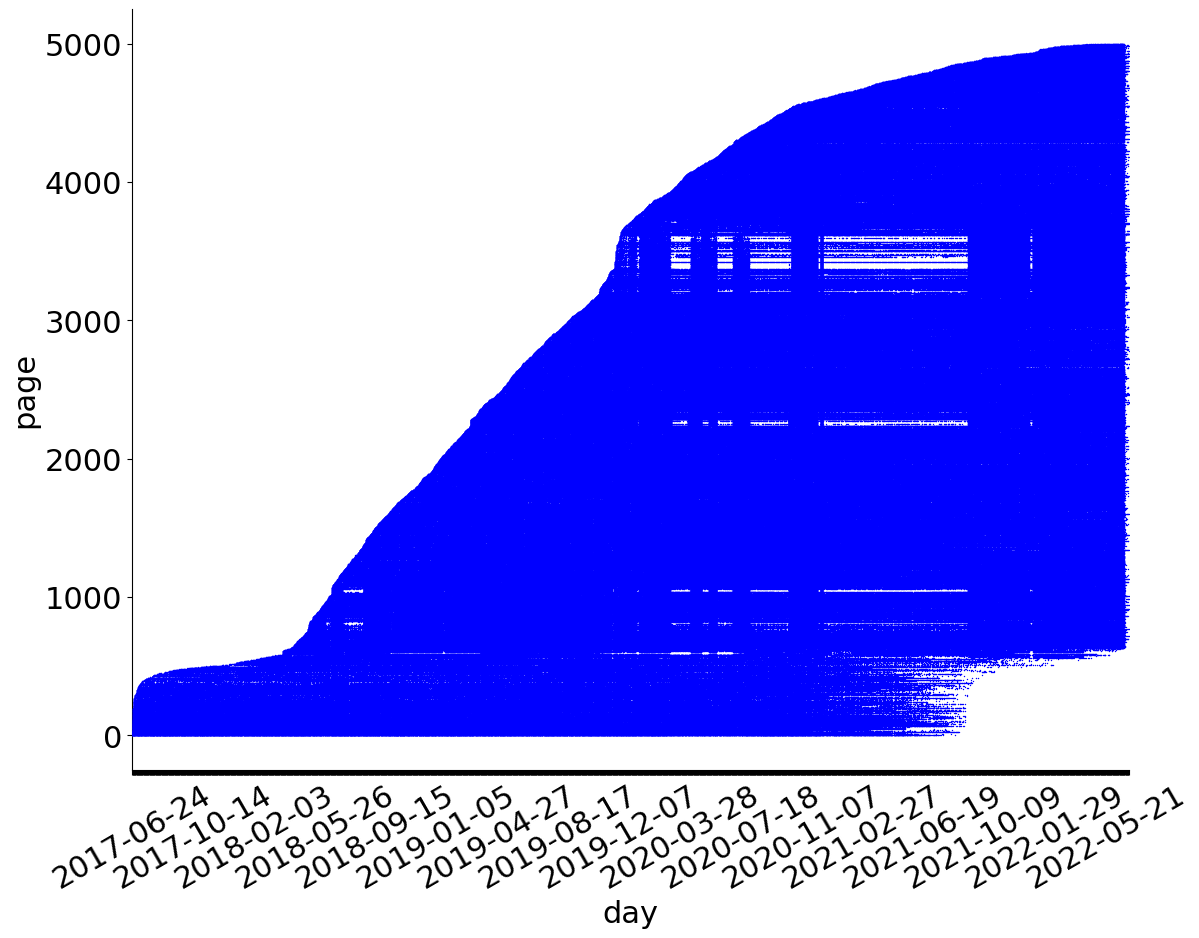

In [46]:
g = sns.catplot(data=PAGES_TO_CONSIDER, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=1)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%112 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


### Active pages per Week

In [47]:
NB_PAGES = 1000
PAGE_IDS = ACTIVE_PAGES_PER_WEEK.groupby('page').day.count().reset_index().sort_values(by='day', ascending=True)["day"].to_list()[:NB_PAGES]

PAGES_TO_CONSIDER = ACTIVE_PAGES_PER_WEEK[ACTIVE_PAGES_PER_WEEK["page"].isin(PAGE_IDS)]

PAGES_TO_CONSIDER

,Unnamed: 0,day,page
0,0,2017-06-19,1
24,24,2017-06-19,25
25,25,2017-06-19,26
26,26,2017-06-19,27
27,27,2017-06-19,28
...,...,...,...
5659033,5659033,2022-06-20,31
5659032,5659032,2022-06-20,28
5659031,5659031,2022-06-20,27
5659030,5659030,2022-06-20,26


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

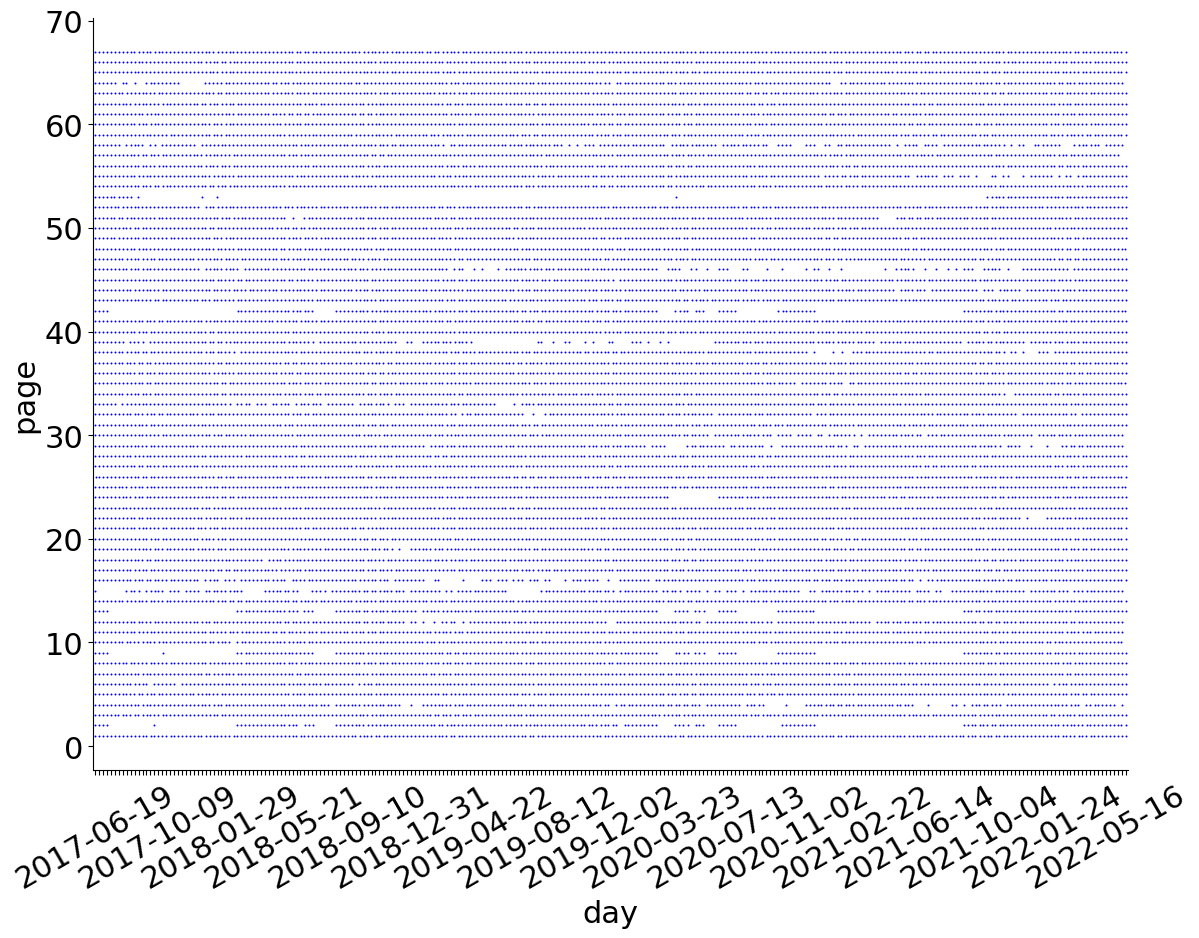

In [48]:
g = sns.catplot(data=PAGES_TO_CONSIDER, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=2)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%16 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


In [49]:
US_PAGES

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,page_created_year,number_of_weeks_since_creation,number_of_days_between_first_and_last_posts
0,0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17,2010,604.0,1827
1,1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17,2010,630.0,1827
2,2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2,2015,352.0,1820
3,3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24,2016,313.0,1827
4,4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13,2018,226.0,1561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

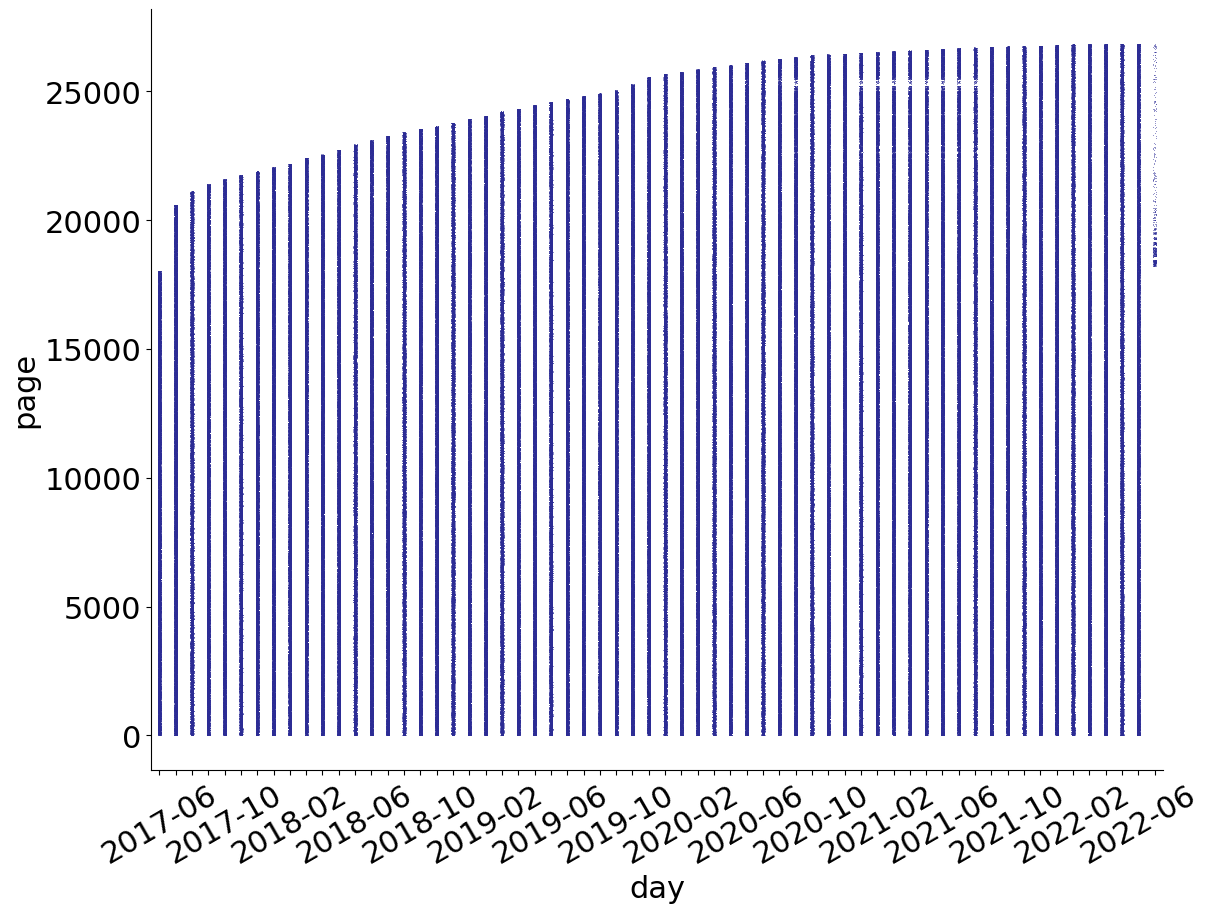

In [50]:
g = sns.catplot(data=ACTIVE_PAGES_PER_MONTH, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=0.2)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%4 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

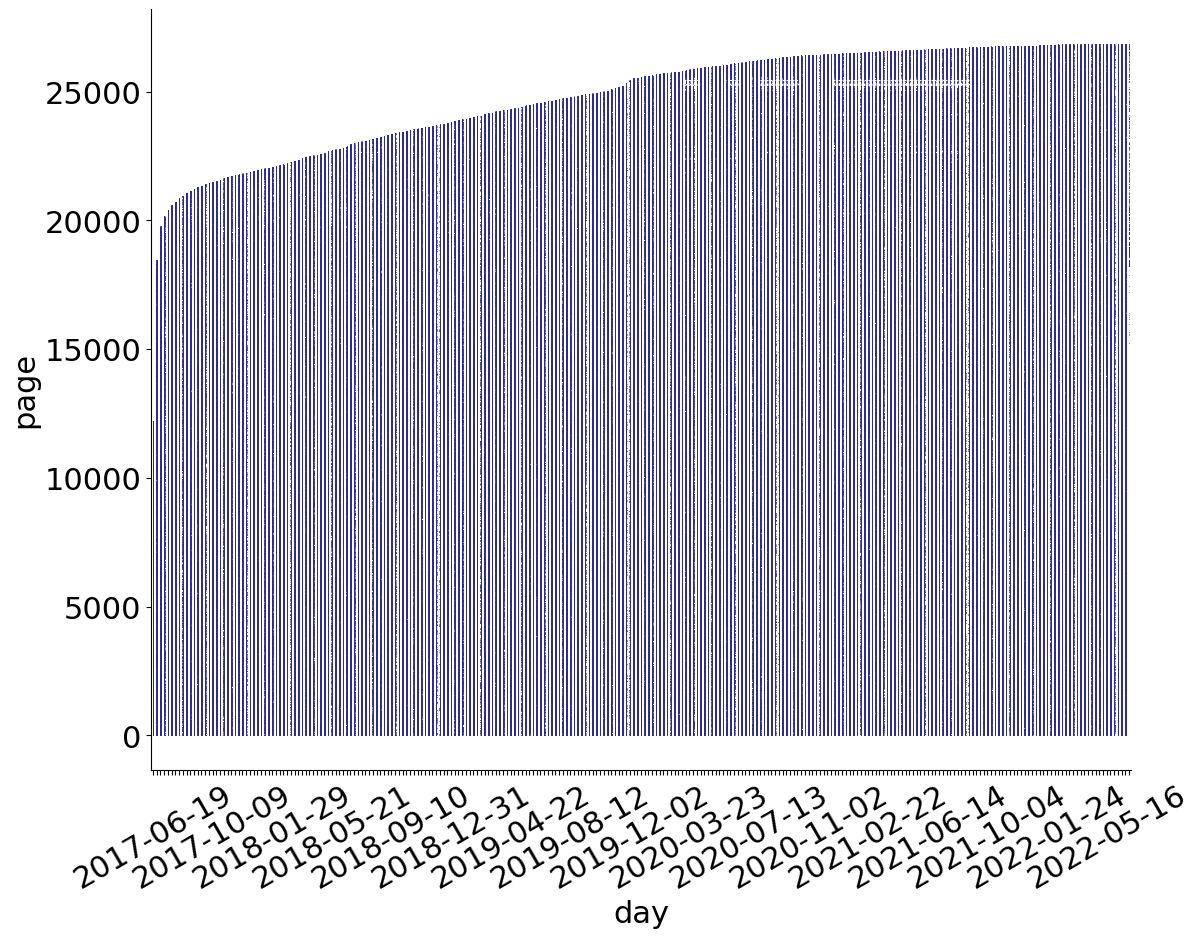

In [51]:
g = sns.catplot(data=ACTIVE_PAGES_PER_WEEK, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=0.2)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%16 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

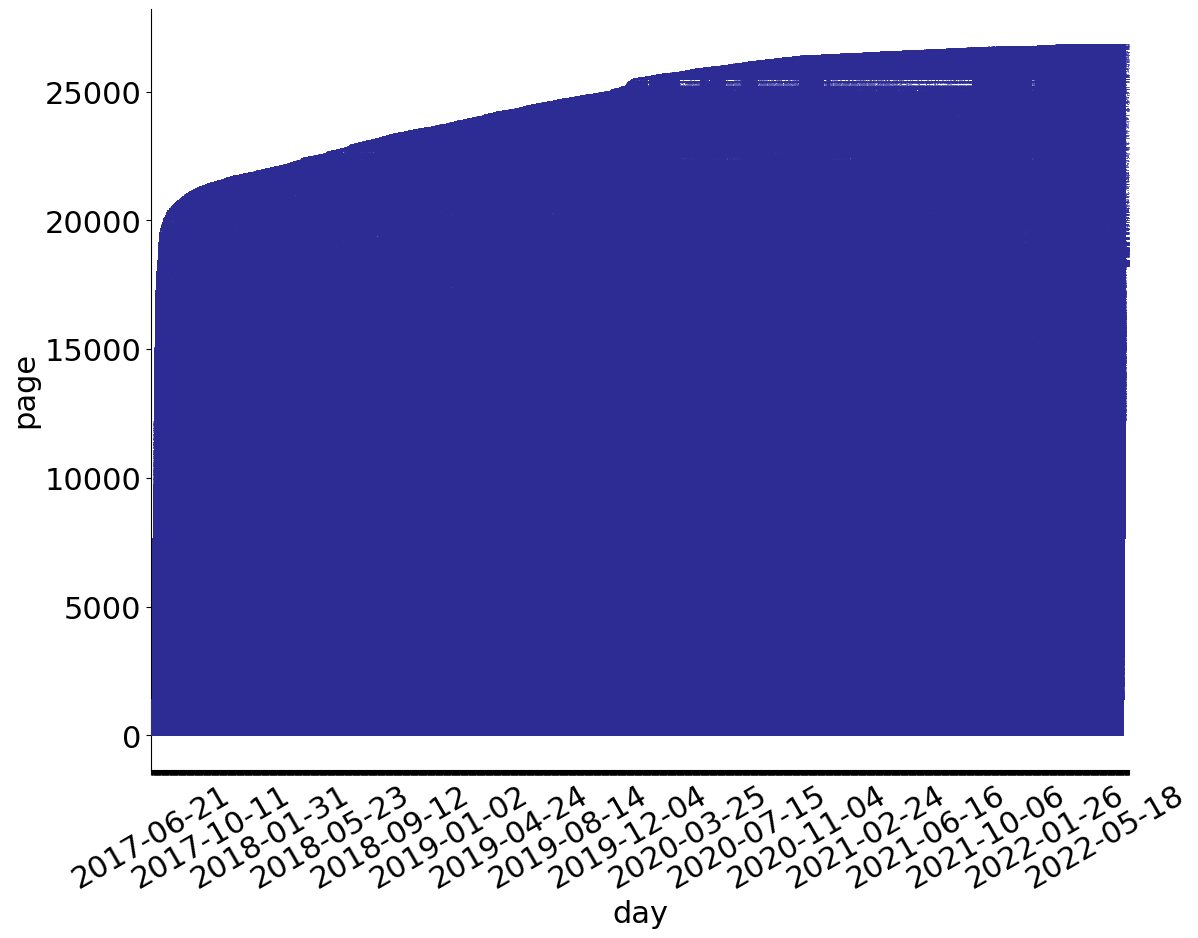

In [52]:
g = sns.catplot(data=ACTIVE_PAGES_PER_DAY, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=0.2)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%112 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


In [53]:
from urllib.parse import urlparse

In [54]:
from collections import Counter

In [58]:
'''
import tldextract

domains_per_page = dict()

for idx, row in US_PAGES.iterrows():
    
    if row["page_id"] in domains_per_page:
        continue
        
    if str(row["history_file"]) == "nan":
        continue
    
    history_data = pd.read_csv(row["history_file"])
    final_links = history_data["final_link"].to_list()
    links = history_data["link"].to_list()
    
    domains = []
    
    for i in range(len(links)):
        
        domain = ""

        if str(final_links[i]) != "nan":
            domain = tldextract.extract(final_links[i]).domain            
        elif str(links[i]) != "nan":
            domain = tldextract.extract(links[i]).domain
            

        if domain not in ["facebook"]:
            domains.append(domain)
            
#        if domain == "trib":
#            print(links[i], final_links[i])
    
    domains = Counter(domains)
    total = sum(domains.values())
    domains = domains.most_common()
    
    domains_per_page[row["page_id"]] = {item[0]:(item[1]/total, item[1]) for item in domains}

with open('domains_per_page.pkl', 'wb') as f:
    pickle.dump(domains_per_page, f)
    
'''

'\nimport tldextract\n\ndomains_per_page = dict()\n\nfor idx, row in US_PAGES.iterrows():\n    \n    if row["page_id"] in domains_per_page:\n        continue\n        \n    if str(row["history_file"]) == "nan":\n        continue\n    \n    history_data = pd.read_csv(row["history_file"])\n    final_links = history_data["final_link"].to_list()\n    links = history_data["link"].to_list()\n    \n    domains = []\n    \n    for i in range(len(links)):\n        \n        domain = ""\n\n        if str(final_links[i]) != "nan":\n            domain = tldextract.extract(final_links[i]).domain            \n        elif str(links[i]) != "nan":\n            domain = tldextract.extract(links[i]).domain\n            \n\n        if domain not in ["facebook"]:\n            domains.append(domain)\n            \n#        if domain == "trib":\n#            print(links[i], final_links[i])\n    \n    domains = Counter(domains)\n    total = sum(domains.values())\n    domains = domains.most_common()\n    \n  

In [59]:

history_data = pd.read_csv(US_PAGES[US_PAGES["page_id"] == 159903787387343]["history_file"].to_list()[0])
final_links = history_data["final_link"].to_list()
links = history_data["link"].to_list()
    
domains = []
    
for i in range(len(links)):
        
    domain = ""

    if str(final_links[i]) != "nan":
        domain = tldextract.extract(final_links[i]).domain            
    elif str(links[i]) != "nan":
        domain = tldextract.extract(links[i]).domain
        

    if domain not in ["facebook"]:
        domains.append(domain)
            
#        if domain == "trib":
#            print(links[i], final_links[i])
    
domains = Counter(domains)
total = sum(domains.values())
domains = domains.most_common()


In [60]:
import requests

def unshorten_url(url):
    site = requests.get(url, timeout = 2)
    return site.url

In [61]:
r = requests.get("https://unshorten.me/json/https://bit.ly/3KGBNta")
r.json()["resolved_url"]


'https://patch.com/new-york/washington-heights-inwood/nomadland-nyc-graffiti-attack-drives-out-family-living-rv?utm_source=facebook.com&utm_medium=social&utm_campaign=blasts'

In [62]:
DONE_PAGES = []


In [63]:
PROBLEMATIC_IDS = [727751033951178, 49134238659, 5953023255, 227301997254, 369541380877, 78676319643, 156069120895, 344774315596752, 328229660634051, 1519576324996959]


In [64]:
link_per_link = dict()

In [65]:
for idx, page in US_PAGES.iterrows():
        
    try:
                
#        if page["page_id"] in DONE_PAGES or page["page_id"] in PROBLEMATIC_IDS:
#            continue
        
 
        if page["page_id"] not in PROBLEMATIC_IDS:
            continue
            
        if os.path.exists("/ssd/news_discovery/data/pages_posts_history_minhkha_with_url_shorteners/"+page["history_file"].split("/")[3]):
            continue

        history_data = pd.read_csv(page["history_file"])
        history_data["unshortened_link"] = history_data.shape[0] * [""]

        final_links = history_data["final_link"].to_list()
        links = history_data["link"].to_list()

        print(page["page_id"], "number of posts", history_data.shape[0])
        for i, post in history_data.iterrows():

            domain = ""
            link = ""

            if str(final_links[i]) != "nan":
                domain = tldextract.extract(final_links[i]).domain
                link = final_links[i]
            elif str(links[i]) != "nan":
                domain = tldextract.extract(links[i]).domain
                link = links[i]


            if domain in ["trib", "ow", "t", "bitly", "tinyurl", "rebrandly", "usehyperlink", "tiny", "bit", "clickmeter", "shorte", "cutt", "clkim"]:
            #    print(link)
                
                unshortened_link = link_per_link.get(link, -1)
                
                if unshortened_link == -1:
                    unshortened_link = unshorten_url(link)
                    link_per_link[link] = unshortened_link

    #            print(unshortened_link)
          #      print(unshortened_link)
                history_data.at[i,'unshortened_link'] = unshortened_link
                

        history_data.to_csv("../data/pages_posts_history_minhkha_with_url_shorteners/"+page["history_file"].split("/")[3])
        DONE_PAGES.append(page["page_id"])
        
        
    except Exception as e:
        print(page["page_id"])
        print(e)
        print(dir(e.args))
        print()
        PROBLEMATIC_IDS.append(page["page_id"])
        continue
        
        

727751033951178
name 'os' is not defined
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']

49134238659
name 'os' is not defined
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']

5953023255
name 'os' i

In [66]:
to_treat = []
IGNORE = [328229660634051, 54140856804, 110796122273412]
for idx, page in US_PAGES.iterrows():
    if str(page["history_file"]) == "nan":
        continue
        
    if os.path.exists("/ssd/news_discovery/data/pages_posts_history_minhkha_with_url_shorteners/"+page["history_file"].split("/")[3]):
        continue
        
    to_treat.append(idx)

    


for idx, page in US_PAGES.iterrows():
        
                        
        if idx not in to_treat:
            continue
            
        if page["page_id"] in IGNORE:
            continue
        
        history_data = pd.read_csv(page["history_file"])
        history_data["unshortened_link"] = history_data.shape[0] * [""]

        final_links = history_data["final_link"].to_list()
        links = history_data["link"].to_list()

        print(page["page_id"], "number of posts", history_data.shape[0])

        if history_data.shape[0] < 10000 or history_data.shape[0] > 15000:
            continue

        stop = False
        
        for i, post in history_data.iterrows():
            
            try:
                
                domain = ""
                link = ""

                if str(final_links[i]) != "nan":
                    domain = tldextract.extract(final_links[i]).domain
                    link = final_links[i]
                    
                elif str(links[i]) != "nan":
                    domain = tldextract.extract(links[i]).domain
                    link = links[i]

                if domain in ["trib", "ow", "t", "bitly", "tinyurl", "rebrandly", "usehyperlink", "tiny", "bit", "clickmeter", "shorte", "cutt", "clkim"]:

                    unshortened_link = link_per_link.get(link, -1)

                    if unshortened_link == -1:
                        unshortened_link = unshorten_url(link)
                        link_per_link[link] = unshortened_link

                    history_data.at[i,'unshortened_link'] = unshortened_link
                    
            except Exception as e:

                unshortened_link = read_url_from_exception(str(e))

                if unshortened_link == -1:        
                    print(page["page_id"])
                    print(e)
                    print()
                    stop = True
                    break


                else:
                    history_data.at[i,'unshortened_link'] = unshortened_link

        
        if stop == False:            
            history_data.to_csv("../data/pages_posts_history_minhkha_with_url_shorteners/"+page["history_file"].split("/")[3])
            DONE_PAGES.append(page["page_id"])
    
    

            
 
        
        

NameError: name 'os' is not defined

In [ ]:
328229660634051, 54140856804, 110796122273412

In [ ]:
print("a")

In [67]:
def read_url_from_timeout_exception(e):
    
    beginning_host = e.index("host='")+6
    
    if beginning_host == -1:
        return -1
    
    end_host = e.index("'", beginning_host)
    
    if end_host == -1:
        return -1
    
    return "https://"+e[beginning_host:end_host]
    

In [68]:
def read_url_from_exception(e):
    
    if "HTTPSConnectionPool" in e and "timed out" in e:
        
        return read_url_from_timeout_exception(e)
    
    try:
        beginning_host = e.index("host='") + 6

        if beginning_host == -1:
            return -1

        end_host = e.index("'", beginning_host)

        if end_host == -1:
            return -1

        beginning_url = e.index("url: ", end_host) + 5

        if beginning_url == -1:
            return -1

        end_url = e.index(" ", beginning_url)

        if end_url == -1:
            return -1

        return "https://" + e[beginning_host : end_host] + e[beginning_url : end_url]
    
    except:
        return -1

In [69]:
e = "HTTPSConnectionPool(host='vista.today', port=443): Max retries exceeded with url: /2021/02/local-independent-bookstores-beef-up-their-online-presence-to-survive-pandemic/?utm_source=VISTA+Today&utm_campaign=ac1f0d0d4c-DailyEmailCampaign5_27_2015&utm_medium=email&utm_term=0_75b1fa784c-ac1f0d0d4c-275166653 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f2ebcb5dc88>, 'Connection to vista.today timed out. (connect timeout=5)'))"
read_url_from_exception(e)



'https://vista.today'

In [ ]:
#HNA

In [ ]:
history_data

### Number of posts per week for all pages

In [70]:
WEEKS_TO_CONSIDER = []

start_date = date(2007, 1, 1) 
end_date = date(2022, 12, 31) 
delta = (end_date - start_date)

for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    day = day.strftime("%Y-%m-%d")
    
    WEEKS_TO_CONSIDER.append(day)
    


In [71]:
#HERE WE TRANSFORM THE DICTIONARY BY DAY TO A DICTIONARY BY MONTH
 
POSTS_PER_WEEK_PER_PAGE = dict()

total_weeks = len(WEEKS_TO_CONSIDER)

for idx in range(len(WEEKS_TO_CONSIDER)):
     
    current_week = WEEKS_TO_CONSIDER[idx]

    if idx+1 == total_weeks:
        next_week = "2023-01-01"
        
    else:
        next_week = WEEKS_TO_CONSIDER[idx+1]
    
    for page_id, values in POSTS_PER_DAY_PER_PAGE.items():
            
        if page_id not in POSTS_PER_WEEK_PER_PAGE:
            POSTS_PER_WEEK_PER_PAGE[page_id] = dict()
            
            
        active_days = list(values.keys())
        active_days = [item for item in active_days if current_week <= item < next_week ]
        total = sum([values[item] for item in active_days])
                
        POSTS_PER_WEEK_PER_PAGE[page_id][current_week] = total
        

KeyboardInterrupt: 

In [ ]:
POSTS_PER_WEEK_PER_PAGE = {key: value for key, value in POSTS_PER_WEEK_PER_PAGE.items() if key in US_PAGES["page_id"].to_list()}


In [ ]:
POSTS_PER_WEEK_PER_LISTED_PAGE = {key: value for key, value in POSTS_PER_WEEK_PER_PAGE.items() if key in LISTED_PAGES["page_id"].to_list()}

POSTS_PER_WEEK_PER_NONLISTED_PAGE = {key: value for key, value in POSTS_PER_WEEK_PER_PAGE.items() if key in NONLISTED_PAGES["page_id"].to_list()}



In [ ]:
sdate = datetime.strptime("2018-07-01", "%Y-%m-%d")
edate = datetime.strptime("2022-07-01", "%Y-%m-%d")

all_dates = [(sdate+timedelta(days=x)).strftime("%Y-%m-%d") for x in range((edate-sdate).days)]

In [ ]:
df = []

for date in all_dates:
    listed_posts = 0
    nonlisted_posts = 0

    listed_active = 0
    nonlisted_active = 0


    for page_id, dates_values in POSTS_PER_WEEK_PER_LISTED_PAGE.items():
        
        if dates_values[date] > 0:
            listed_posts += dates_values[date]
            listed_active += 1

            
    for page_id, dates_values in POSTS_PER_WEEK_PER_NONLISTED_PAGE.items():
        
        if dates_values[date] > 0:
            nonlisted_posts += dates_values[date]
            nonlisted_active += 1

    df.append({"day":date, "MBFC/NG active pages": listed_active, "Non-MBFC/NG active pages": nonlisted_active, "MBFC/NG total posts": listed_posts, "Non-MBFC/NG total posts": nonlisted_posts, "total_posts": nonlisted_posts+listed_posts})
    
df = pd.DataFrame(df)

    

In [ ]:
df["month"] = [item[:7] for item in df["day"].to_list()]
df["total_posts_reduced"] = [item/1000000for item in df["total_posts"].to_list()]
df

In [ ]:
to_plot = df.groupby("month").sum("total_posts_reduced").reset_index()
fig, ax = plt.subplots(figsize=(15,6))
to_plot.plot(kind='bar',ax=ax,color=['blue', "green"],rot=45, y=["total_posts_reduced"], x="month", grid=True, legend = False)



loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('')
ax.set_ylabel('Number of posts (x $10^6$)')
plt.title('')
plt.show()

fig.savefig('figures/number_of_posts_per_month.pdf', bbox_inches='tight')



In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
df.plot(kind='line',ax=ax,color='blue',rot=45, y=["MBFC/NG total posts"], x="day")
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('')
ax.set_ylabel('#Pages')
plt.title('The timeline of page creation')
plt.show()


In [ ]:
# HERE WE CHANGE THE PAGE IDS, TO GIVE THEM INCREMENTING IDS FROM 1 TO N 
POSTS_PER_WEEK_PER_FAKE_ID = {}
idx = 1
for page_id, values in POSTS_PER_WEEK_PER_PAGE.items():
    POSTS_PER_WEEK_PER_FAKE_ID[idx] = values    
    idx+=1

In [ ]:
# HERE WE REVERT THE DICTIONARY -- WE CREATE A DICTIONARY WHERE KEYS ARE DAYS AND VALUES ARE ACTIVE PAGES

ACTIVE_PAGES_PER_WEEK = {}

for week in WEEKS_TO_CONSIDER: 
    
    ACTIVE_PAGES_PER_WEEK[week] = []
    
    for page_id, values in POSTS_PER_WEEK_PER_FAKE_ID.items():
        
        if values[week] > 0:
            
            ACTIVE_PAGES_PER_WEEK[week].append(page_id)
            

In [ ]:
# Creating dataframe where each line represents that a page was active in a day 
df = []
for day, pages in ACTIVE_PAGES_PER_WEEK.items():
    df += [{"day":day, "page": page} for page in pages]

df = pd.DataFrame(df)
df

In [ ]:
df.to_csv("active_pages_per_day.csv")

In [ ]:

#fig, ax = plt.subplots(figsize=(14, 5))
 
# drawing the plot
g = sns.catplot(data=df, x="day", y="page", height=9, aspect=11.7/8.27, color="blue", s=0.1)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%4 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()
#plt.show()





# 4. Ownership of pages

### News Organizations

In [ ]:
print("Number of news organizations", len(set(US_PAGES["adLib_Organization"].to_list())))

In [ ]:
counter_overall = Counter(US_PAGES["adLib_Organization"].to_list())
listed_counter = Counter(LISTED_PAGES["adLib_Organization"].to_list())
nonlisted_counter = Counter(NONLISTED_PAGES["adLib_Organization"].to_list())

counter_all_together = list()

for organization, value_all in counter_overall.items():
    counter_all_together.append({
        "organization" : organization,
        "total" : value_all,
        "# Listed" : listed_counter[organization],
        "# non-listed" : nonlisted_counter[organization]
    })

pd.DataFrame(counter_all_together).sort_values(by=['total'], ascending=False)[["organization", "# Listed", "# non-listed"]].head(20)

### 5. Authentic behavior

In [ ]:
listed_days = LISTED_PAGES["number_of_days_between_first_and_last_posts"].to_list()
non_listed_days = NONLISTED_PAGES["number_of_days_between_first_and_last_posts"].to_list()

cdf([listed_days, non_listed_days], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", ["green", "blue"], x_title = "", xlog=False, size = (15, 6))



In [73]:
US_PAGES[US_PAGES["number_of_days_between_first_and_last_posts"] < 180]

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,page_created_year,number_of_weeks_since_creation,number_of_days_between_first_and_last_posts
8,9,9,9,9,9,9,671063729677393,DraPand,2022-01-17,2022-06-20,27359.0,27177.0,NEWS_SITE,390,5068.0,337.866667,292.0,15,False,True,en,US,83.589744,16.410256,0.0,messagescheduler.com,messagescheduler.com,1,26.000000,17.727273,0,2014-11,['US'],['en'],['NEWS_SITE'],['DraPand'],9,US,en,NEWS_SITE,1,1,1,1,1.0,"United States (6), China (1), Indonesia (1)",NaN,NaN,US,NaN,8.0,3.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/6710637296...,2015-01-01,2022-06-02,0,9,2014,400.0,154
781,1197,1197,1197,1197,1197,1197,105136451736295,Daily Natural Medicine,2022-01-24,2022-06-20,231253.0,226320.0,MEDIA_NEWS_COMPANY,772,585599.0,27885.666667,17005.0,21,False,True,en,US,91.321244,8.160622,0.518135,news29media.com,news29media.com,1,36.761905,36.761905,0,2021-05,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Daily Natural Medicine'],7,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,True,1.051365e+14,-1,100067620999986,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000676209...,2015-01-01,2022-06-02,0,6,2021,61.0,147
828,1264,1264,1264,1264,1264,1264,112909148820953,"Stephanie Stephens, M.A.",2022-01-31,2022-06-20,0.0,2536.0,NEWS_SITE,90,44.0,2.095238,1.0,21,False,True,en,US,94.444444,4.444444,1.111111,self.com | allure.com | vogue.com | nytimes.co...,self.com,12,4.285714,4.500000,0,2011-11,['US'],['en'],['NEWS_SITE'],"['Stephanie Stephens, M.A.']",4,US,en,NEWS_SITE,1,1,1,1,1.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,True,1.129091e+14,-1,100063620496255,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000636204...,2015-01-01,2022-06-02,0,6,2011,556.0,140
1024,1560,1560,1560,1560,1560,1560,101581329115492,Freedom Street,2022-01-31,2022-06-20,0.0,307548.0,NEWS_SITE,954,1156996.0,55095.047619,43324.0,21,False,True,en,US,76.624738,23.375262,0.0,thebluestateconservative.com | trendingpolitic...,thebluestateconservative.com,2,45.428571,47.700000,0,2022-01,['US'],['en'],['NEWS_SITE'],['Freedom Street'],23,US,en,NEWS_SITE,1,1,1,1,1.0,United States (2),The Blue State Conservative,"Sheridan, Sheridan County, Wyoming, 82801, Uni...",US,US,2.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1015813291...,2015-01-01,2022-06-02,0,16,2022,26.0,140
1065,1620,1620,1620,1620,1620,1620,102057889044394,UpNext Tv,2022-01-10,2022-06-20,0.0,48581.0,MEDIA_NEWS_COMPANY,1524,774152.0,32256.333333,30459.5,24,False,True,en,US,0.0,43.766404,56.233596,NaN,NaN,1,63.500000,66.260870,0,2022-01,['US'],['en'],['MEDIA_NEWS_COMPANY'],['UpNext Tv'],14,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,True,1.020579e+14,-1,100076954906485,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000769549...,2015-01-01,2022-06-02,0,8,2022,26.0,161
1193,1825,1825,1825,1825,1825,1825,110944571495860,TAPinto Mount Lau